In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [16]:
url = "https://raw.githubusercontent.com/Saurabh968896/KMeans-University-Clusters/refs/heads/main/Universities_dataset.csv"

In [17]:
Univ = pd.read_csv(url)

In [18]:
Univ.head(10)

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [19]:
Univ.shape

(25, 7)

In [20]:
Univ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Univ      25 non-null     object
 1   SAT       25 non-null     int64 
 2   Top10     25 non-null     int64 
 3   Accept    25 non-null     int64 
 4   SFRatio   25 non-null     int64 
 5   Expenses  25 non-null     int64 
 6   GradRate  25 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.5+ KB


In [21]:
Univ.describe()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,1266.440000,76.480000,39.200000,12.72000,27388.000000,86.720000
std,108.359771,19.433905,19.727308,4.06735,14424.883165,9.057778
min,1005.000000,28.000000,14.000000,6.00000,8704.000000,67.000000
25%,1240.000000,74.000000,24.000000,11.00000,15140.000000,81.000000
50%,1285.000000,81.000000,36.000000,12.00000,27553.000000,90.000000
75%,1340.000000,90.000000,50.000000,14.00000,34870.000000,94.000000
max,1415.000000,100.000000,90.000000,25.00000,63575.000000,97.000000


In [23]:
Univ.duplicated().sum()

np.int64(0)

# ***Standardisation of Data***

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_univ_df = scaler.fit_transform(Univ.iloc[:,1:])
scaled_univ_df

array([[ 0.41028362,  0.6575195 , -0.88986682,  0.07026045, -0.33141256,
         0.82030265],
       [ 1.39925928,  1.23521235, -0.73465749, -1.68625071,  2.56038138,
        -0.64452351],
       [-0.06065717, -0.76045386,  1.02438157, -0.93346022, -0.16712136,
        -1.65863393],
       [ 0.41028362, -0.02520842, -0.78639393, -0.18066972,  0.29164871,
         0.14422904],
       [ 0.12771914,  0.34241431, -0.32076595,  0.07026045, -0.39084607,
         0.36958691],
       [ 0.69284809,  0.6575195 , -0.83813038, -0.68253005,  0.33778044,
         0.93298158],
       [ 0.4573777 ,  0.71003703, -0.47597528, -0.18066972,  0.29695528,
         0.93298158],
       [-0.10775125, -0.13024348, -0.78639393, -0.18066972, -0.51381683,
         0.59494478],
       [ 1.25797704,  0.76255456, -1.30375836, -0.43159988,  0.85874344,
         1.15833946],
       [ 0.36318954, -0.07772595,  0.24833493, -1.43532055,  2.21481798,
         0.0315501 ],
       [ 1.06960072,  0.92010716, -0.47597528, -0.

# ***Finding best K by Elbow Method***

In [25]:
from sklearn.cluster import KMeans

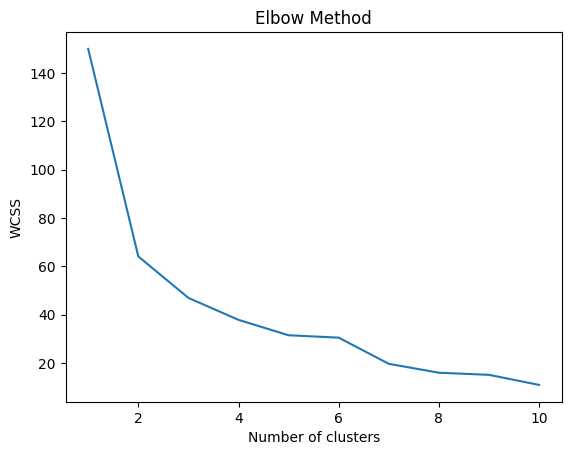

In [26]:
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(scaled_univ_df)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



# ***Building Cluster Algorithm***

In [27]:
clusters_new = KMeans(3, random_state=42)
clusters_new.fit(scaled_univ_df)

KMeans(n_clusters=3, random_state=42)

In [28]:
clusters_new.labels_

array([2, 0, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2,
       2, 1, 2], dtype=int32)

# ***Assigning clusters to the new dataset***

In [29]:
Univ['Clusteroid_new'] = clusters_new.labels_

In [30]:
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Clusteroid_new
0,Brown,1310,89,22,13,22704,94,2
1,CalTech,1415,100,25,6,63575,81,0
2,CMU,1260,62,59,9,25026,72,1
3,Columbia,1310,76,24,12,31510,88,2
4,Cornell,1280,83,33,13,21864,90,2
5,Dartmouth,1340,89,23,10,32162,95,2
6,Duke,1315,90,30,12,31585,95,2
7,Georgetown,1255,74,24,12,20126,92,2
8,Harvard,1400,91,14,11,39525,97,2
9,JohnsHopkins,1305,75,44,7,58691,87,0


# ***Accuracy***

In [35]:
from sklearn.metrics import silhouette_samples,silhouette_score

In [36]:
silhouette_score_average = silhouette_score(scaled_univ_df, clusters_new.labels_)

In [37]:
silhouette_score_average

np.float64(0.4222470059484323)